<a href="https://colab.research.google.com/github/lasiadhi/Prediction-of-hypoxemia-trend/blob/master/Explore_O2_devices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#################################################
###### @author: Lasith Adhikari (python 3)  #####
############ Created on Nov 15, 2019 ############
# Code description: 
# Explore O2 device table

In [0]:
# Import libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import tensorflow as tf

# Below imports are used to print out pretty pandas dataframes
from IPython.display import display, HTML

# Imports for accessing Datathon data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery

In [0]:
from google.colab import files
import seaborn as sns

In [0]:

auth.authenticate_user()

In [0]:
# Note that this should be the project for the datathon work,
# not the physionet-data project which is for data hosting.
project_id = 'hst-953-2019'
os.environ['GOOGLE_CLOUD_PROJECT'] = project_id

In [0]:
# Read data from BigQuery into pandas dataframes.
def run_query(query):
  return pd.io.gbq.read_gbq(
      query,
      project_id=project_id,
      dialect='standard')

In [0]:
df_from_GQ1 = run_query("""
select *
from `physionet-data.eicu_crd_derived.pivoted_o2`
"""
)

In [0]:
df_from_GQ1.head()

,patientunitstayid,chartoffset,entryoffset,o2_flow,o2_device,etco2
0,242290,780,812,36.0,nc,NaN
1,243334,3065,3412,44.0,HFC,NaN
2,243334,3290,3407,44.0,HFC,NaN
3,243334,4310,4391,44.0,HFC,NaN
4,243334,4790,4964,44.0,HFC,NaN


chartoffset: Nurse chart offset time from the ICU admisson \\
entryoffset: Nurse entered offset time from the ICU admisson 

In [0]:
df_from_GQ1.o2_device.value_counts()[0:60]

ventilator           460647
nasal cannula        406314
RA                   108604
BiPAP/CPAP            46408
trach collar          34741
room air              21929
venturi mask          20899
NC                    17128
ra                    15802
vent                  13114
nc                    10791
non-rebreather        10510
cool aerosol mask      9412
Room Air               7788
VENT                   6686
other                  6553
BiPAP                  4416
HFNC                   4323
oxymizer               4191
CPAP                   3669
ROOM AIR               3186
oximizer               2807
high flow              2512
oxymask                2291
R/A                    2158
room air               1690
Room air               1680
face tent              1677
vented                 1669
Oxymizer               1581
r/a                    1416
NIV                    1380
Vent                   1143
NCH                    1054
TC                      944
nasal canula        

In [0]:
df_from_GQ1.o2_device.value_counts().sum()

1296498

In [0]:
df_from_GQ1.o2_device.nunique()

2855

In [0]:
o2_device_list_raw = pd.DataFrame(df_from_GQ1.o2_device.unique())

In [0]:
o2_device_list_raw

,0
0,nc
1,HFC
2,Oxy mask
3,non-rebreather
4,CPAP
5,cpap
6,other
7,bipap
8,Vent
9,HFNC


- There are over 2800 different types of O2 devices -- including different names for the same device

In [0]:
#o2_device_list_raw.to_csv('raw_o2_device_list_from_all_hospitals.csv')
#files.download('raw_o2_device_list_from_all_hospitals.csv')

In [0]:
o2_dev_counts1000 = df_from_GQ1.o2_device.value_counts()[df_from_GQ1.o2_device.value_counts()>1000]

In [0]:
o2_dev_counts1000 = o2_dev_counts1000/o2_dev_counts1000.sum()*100

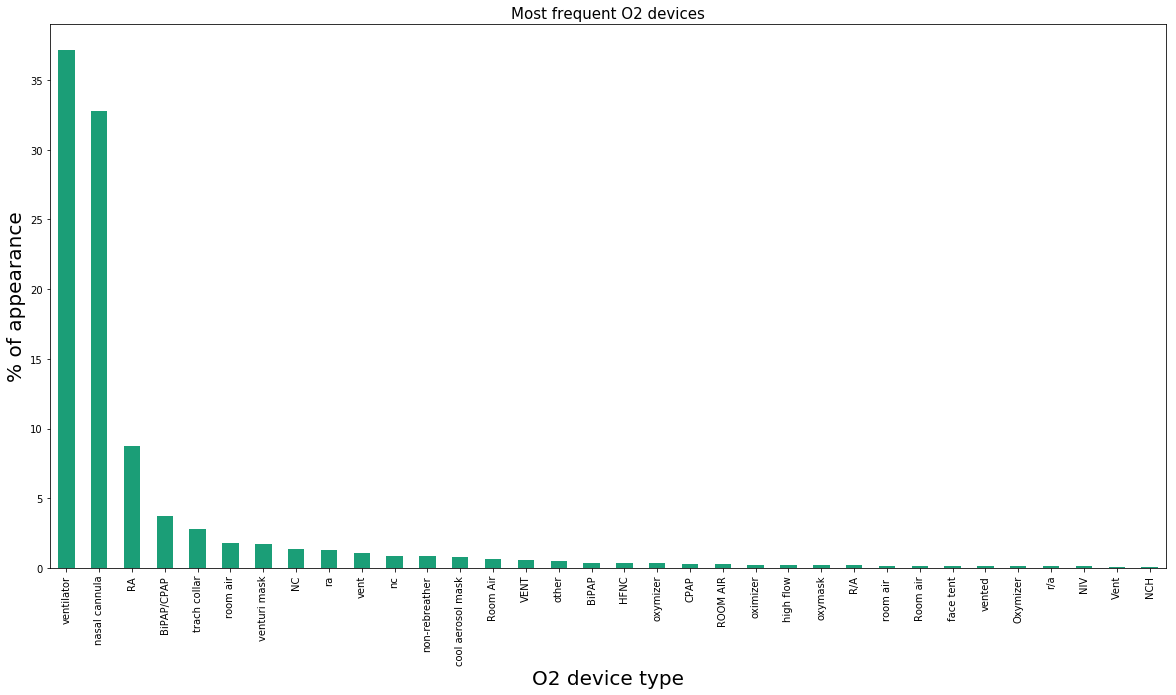

In [0]:
plt.gcf().set_size_inches(20, 10)
o2_dev_counts1000.plot(kind='bar', colormap='Dark2')
plt.title('Most frequent O2 devices', fontsize=15)
plt.xlabel('O2 device type', fontsize=20)
plt.ylabel('% of appearance', fontsize=20)
plt.show()


In [0]:
o2_dev_counts1000

ventilator           37.143889
nasal cannula        32.762793
RA                    8.757194
BiPAP/CPAP            3.742071
trach collar          2.801312
room air              1.768227
venturi mask          1.685174
NC                    1.381102
ra                    1.274181
vent                  1.057437
nc                    0.870123
non-rebreather        0.847465
cool aerosol mask     0.758929
Room Air              0.627979
VENT                  0.539120
other                 0.528396
BiPAP                 0.356081
HFNC                  0.348582
oxymizer              0.337938
CPAP                  0.295847
ROOM AIR              0.256900
oximizer              0.226340
high flow             0.202553
oxymask               0.184733
R/A                   0.174009
room air              0.136272
Room air              0.135465
face tent             0.135224
vented                0.134578
Oxymizer              0.127483
r/a                   0.114178
NIV                   0.111275
Vent    

In [0]:
list(df_from_GQ1.o2_device.unique())

['nc',
 'HFC',
 'Oxy mask',
 'non-rebreather',
 'CPAP',
 'cpap',
 'other',
 'bipap',
 'Vent',
 'HFNC',
 'oyx mask',
 'simple mask',
 'vent',
 'HF NC ',
 'NC ',
 'hfnc',
 'High flow',
 'NC/HF',
 'BIPAP',
 'vent ',
 'Room Air',
 'High Flow',
 'BiPAP',
 'SR',
 'high flow',
 'RA ',
 'NRBM',
 'nasal cannula/high flow',
 'oxymask',
 'Oxy Mask',
 'OxiMask',
 'Ra',
 'Oximask',
 'nasal cannula/HF',
 'oxymizer',
 'VENT',
 'BiPap',
 'HFNC ',
 'cool aerosol mask',
 'nasal cannula HF',
 'HF NC',
 'High Flow Cannula',
 'HF',
 'Oximizer',
 'Bipap',
 'bipap ',
 'Oxymask',
 'mask',
 'nasal cannula-HF',
 'oxy mask ',
 'Mask',
 'oxy mask',
 'OxyMask',
 'high-flow cannula',
 'High Flow Venturi',
 'VentiMask',
 'TRACH COLLAR',
 'nrb',
 'simple  mask',
 'simv',
 'cpap ',
 'Heated humidity',
 'N C',
 'NRB ',
 'OXY MASK',
 '20',
 'Hiflow',
 'HIflow',
 'hiflow',
 'ROOM AIR',
 'Room air',
 'HFLOW',
 'nasal canula',
 'BiPAP/CPAP15/5/50',
 'hi flow',
 'hi-flow',
 'ventilator/CPAP',
 'Hi flow',
 'AC 20 400-45-10',

In [0]:
# Clean O2 device names based on Dr.Ryan's sugesstions:

def clean_o2_device_names_new(current_name):
  if ('high' in current_name.lower()) | ('hf' in current_name.lower())| ('hi' in current_name.lower()) | ('hfnc' in current_name.lower())| (current_name.lower().strip()=='vapotherm')|\
      (current_name.lower().strip()=='optiflow') | (current_name.lower().strip()=='blender')| (current_name.lower().strip()=='optiflo'):
    return 'high_flow'
  elif (current_name.lower().strip()=='ventilator')  | (current_name.lower().strip()== 'vented') | (current_name.lower().strip()== 'vent')  | ('ac ' in current_name.lower())| ('ac/' in current_name.lower())|\
      (current_name.lower().strip()=='mv')| ('ventilator' in current_name.lower())|(current_name.lower().strip()== 'vent:ac22,300,+5')| (current_name.lower().strip()== 'vent simv')  :
    return 'Iv-vent'
  elif  ('bipap' in current_name.lower()) | ('cpap' in current_name.lower()) | ('pap' in current_name.lower())|\
        ('niv' in current_name.lower())| ('nimv' in current_name.lower()):
    return 'Niv-vent'
  elif (current_name.lower().strip()=='nasal cannula') | (current_name.lower().strip()=='nc') | ('nasal' in current_name.lower())| (current_name.lower().strip()=='n/c') | (current_name.lower().strip()=='n c')  |\
       ('nc' in current_name.lower()) | ('cannula' in current_name.lower()) |\
       (current_name.lower().strip()=='non-rebreather') | ('nrb' in current_name.lower())| ('ventimask' in current_name.lower())| ('vm' in current_name.lower())|('venturi' in current_name.lower())| \
       ('oxi' in current_name.lower()) | ('mask' in current_name.lower()) | ('oxy' in current_name.lower())| ('face' in current_name.lower()) |\
       ('misty ox' in current_name.lower()) | ('trach' in current_name.lower()) | ('tc' in current_name.lower()) | ('tube' in current_name.lower()) |\
       ('t-piece' in current_name.lower())| (current_name.lower().strip()=='tp') | (current_name.lower().strip()=='2l')| (current_name.lower().strip()=='tm')| (current_name.lower().strip()=='3l')|\
       (current_name.lower().strip()=='4l') | (current_name.lower().strip()=='nrm'): 
    return 'O2_sup'
  elif (current_name.lower().strip()=='room air') | (current_name.lower().strip()=='ra') | (current_name.lower().strip()=='r/a') | (current_name.lower().strip()=='21')| (current_name.lower().strip()=='21%') |\
       (current_name.lower().strip()=='21ra') | (current_name.lower().strip()=='0.21') | (current_name.lower().strip()=='r/a.')| (current_name.lower().strip()=='r/air') | (current_name.lower().strip()=='r a') |\
       (current_name.lower().strip()=='rom air') | (current_name.lower().strip()=='rooam air') | (current_name.lower().strip()=='rm air')| (current_name.lower().strip()=='roma air')|\
       (current_name.lower().strip()=='rm  air')|\
       (current_name.lower().strip()=='r m air')| (current_name.lower().strip()=='roo air')| ('room' in current_name.lower()) | ('RA' in current_name)  |\
       (current_name.lower().strip() == 'rrom air') | (current_name.lower().strip() == 'ROMM AIR')|\
       (current_name.lower()=='none'):
    return 'Room_air'
  elif ('other' in current_name.lower()):
    return 'other'
  else:
    return 'other'

In [0]:
df_from_GQ1['o2_device_clean'] = df_from_GQ1.o2_device.apply(lambda x: clean_o2_device_names_new(str(x)))

In [0]:
# Convert chartoffset to hours:
df_from_GQ1['chartoffset_hrs']= df_from_GQ1['chartoffset']/60.0

In [0]:
df_from_GQ1.head()

,patientunitstayid,chartoffset,entryoffset,o2_flow,o2_device,etco2,o2_device_clean,chartoffset_hrs
0,242290,780,812,36.0,nc,NaN,O2_sup,13.000000
1,243334,3065,3412,44.0,HFC,NaN,high_flow,51.083333
2,243334,3290,3407,44.0,HFC,NaN,high_flow,54.833333
3,243334,4310,4391,44.0,HFC,NaN,high_flow,71.833333
4,243334,4790,4964,44.0,HFC,NaN,high_flow,79.833333


In [0]:
df_from_GQ1.shape

(3090312, 8)

In [0]:
df_from_GQ1.o2_device.count()

1296498

In [0]:
df_from_GQ1.o2_device.isnull().sum()
#  most of the 02 device values are null

1793814

In [0]:
df_from_GQ1.o2_device_clean.count()

3090312

In [0]:
df_from_GQ1[df_from_GQ1.o2_device.isnull()]

,patientunitstayid,chartoffset,entryoffset,o2_flow,o2_device,etco2,o2_device_clean,chartoffset_hrs
164026,144774,348,348,80.0,None,NaN,Room_air,5.800000
164027,153972,6,16,21.0,None,NaN,Room_air,0.100000
164028,154420,1207,1208,21.0,None,NaN,Room_air,20.116667
164029,167761,28,53,28.0,None,NaN,Room_air,0.466667
164030,172015,401,541,32.0,None,NaN,Room_air,6.683333
164031,177923,1824,1915,28.0,None,NaN,Room_air,30.400000
164032,179277,7,362,80.0,None,NaN,Room_air,0.116667
164033,182542,1400,1875,36.0,None,NaN,Room_air,23.333333
164034,202554,1668,1684,85.0,None,NaN,Room_air,27.800000
164035,202554,1683,1682,65.0,None,NaN,Room_air,28.050000


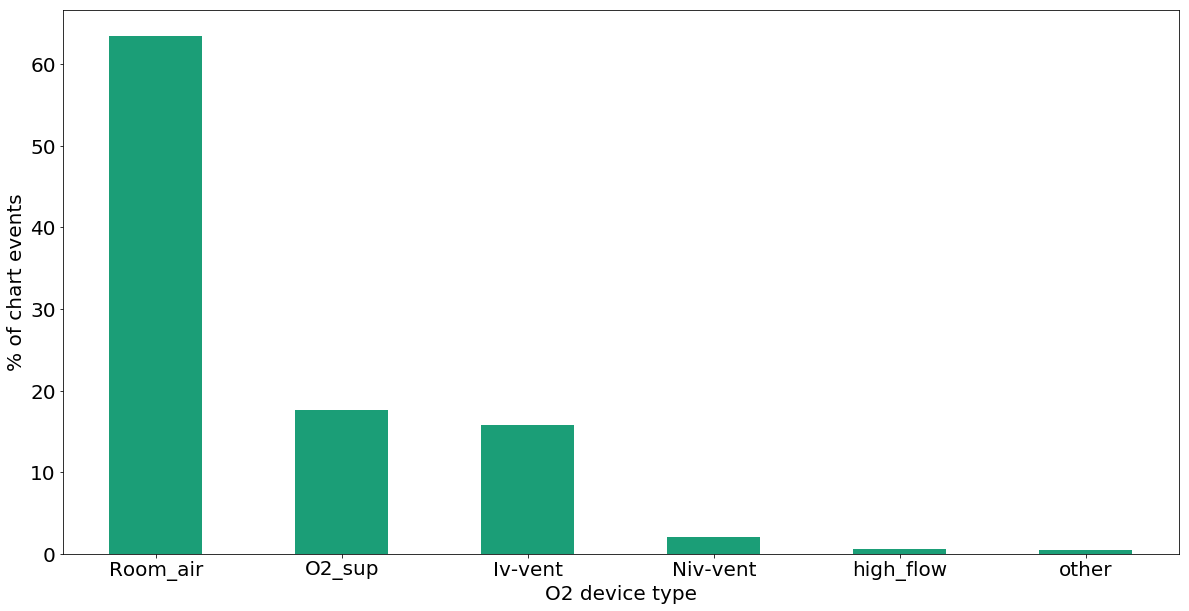

In [0]:
o2_dev_counts_clean = df_from_GQ1.o2_device_clean.value_counts()
o2_dev_counts_clean = o2_dev_counts_clean/o2_dev_counts_clean.sum()*100
plt.gcf().set_size_inches(20, 10)
o2_dev_counts_clean.plot(kind='bar', colormap='Dark2')
#plt.title('O2 chart events percentage by device type', fontsize=15)
plt.xlabel('O2 device type', fontsize=20)
plt.ylabel('% of chart events', fontsize=20)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
plt.show()

In [0]:
o2_dev_counts_clean

Room_air     63.464595
O2_sup       17.595570
Iv-vent      15.790477
Niv-vent      2.056686
high_flow     0.638382
other         0.454291
Name: o2_device_clean, dtype: float64

In [0]:

#@title Default title text
df_from_GQ1.o2_device_clean.value_counts()

Room_air     1961254
O2_sup        543758
Iv-vent       487975
Niv-vent       63558
high_flow      19728
other          14039
Name: o2_device_clean, dtype: int64

In [0]:
#list(df_from_GQ1[df_from_GQ1.o2_device_clean=='other']['o2_device'].unique())
ss = df_from_GQ1[df_from_GQ1.o2_device_clean=='other']['o2_device'].value_counts()
ss[ss>100]

other    6553
CAM       292
100       246
cam       229
98        193
94        118
97        112
Name: o2_device, dtype: int64

In [0]:
# Distribution of different o2 device count by patient 
dev_count_by_pt = df_from_GQ1.groupby('patientunitstayid')['o2_device'].unique().apply(lambda x: len(x)).value_counts()

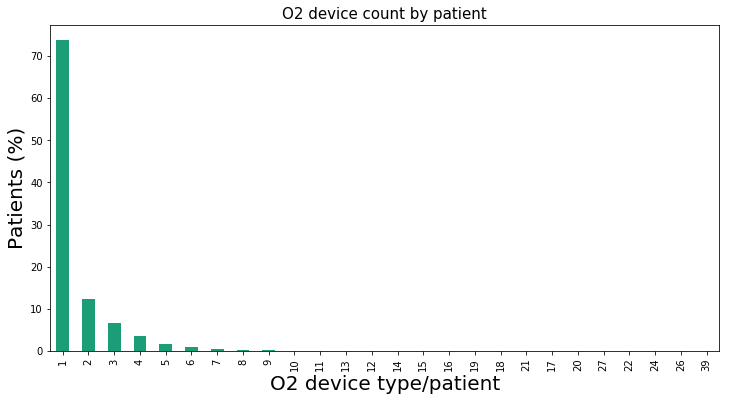

In [0]:
plt.gcf().set_size_inches(12, 6)
(dev_count_by_pt/dev_count_by_pt.sum()*100).plot(kind='bar', colormap='Dark2')
plt.title('O2 device count by patient', fontsize=15)
plt.xlabel('O2 device type/patient', fontsize=20)
plt.ylabel('Patients (%)', fontsize=20)
plt.show()

In [0]:
dev_count_by_pt

1     64623
2     10827
3      5937
4      3035
5      1471
6       752
7       414
8       222
9       132
10       97
11       73
13       36
12       35
14       23
15       21
16        8
19        7
18        5
21        4
17        3
20        2
27        1
22        1
24        1
26        1
39        1
Name: o2_device, dtype: int64

In [0]:
# Plot O2 device chart start time ditribution for the first O2 device evemt for the given patient 

In [0]:
df_from_GQ1.head()

,patientunitstayid,chartoffset,entryoffset,o2_flow,o2_device,etco2,o2_device_clean,chartoffset_hrs
0,242290,780,812,36.0,nc,NaN,O2_sup,13.000000
1,243334,3065,3412,44.0,HFC,NaN,high_flow,51.083333
2,243334,3290,3407,44.0,HFC,NaN,high_flow,54.833333
3,243334,4310,4391,44.0,HFC,NaN,high_flow,71.833333
4,243334,4790,4964,44.0,HFC,NaN,high_flow,79.833333


In [0]:
df_from_GQ1_sorted = df_from_GQ1.sort_values(by=['patientunitstayid','chartoffset'])
df_first_O2_event = df_from_GQ1_sorted.groupby('patientunitstayid')['o2_device_clean','chartoffset_hrs'].first()

In [0]:
df_first_O2_event.head()

,o2_device_clean,chartoffset_hrs
patientunitstayid,,
141168,O2_sup,8.433333
142723,Inv-vent,18.950000
143325,Inv-vent,10.083333
144297,Inv-vent,173.683333
144774,Room_air,5.800000


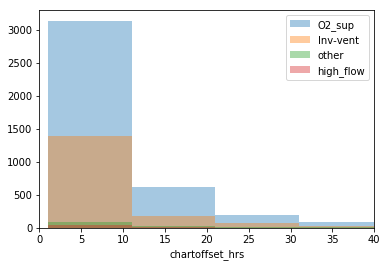

In [0]:
fig, ax = plt.subplots()
for device in df_first_O2_event.o2_device_clean.unique():
   if device!= 'Room_air':
        sns.distplot(df_first_O2_event[df_first_O2_event.o2_device_clean==device]['chartoffset_hrs'], bins=range(1, 110, 10), ax=ax, kde=False, hist=True, label=device)
ax.set_xlim([0, 40])
ax.legend()

In [0]:
#@title Read and merge with Patients table 


In [0]:
df_pts = run_query("""
select *
from `physionet-data.eicu_crd.patient`
"""
)

In [0]:
df_pts.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
0,1137569,844848,Female,75,Other/Unknown,208,513,Emphysema/bronchitis,172.7,17:13:00,-36707,Acute Care/Floor,2015,17:51:00,23811,Death,Expired,MICU,05:00:00,,2,readmit,95.7,86.5,15:06:00,9246,Acute Care/Floor,Alive,011-43764
1,3036927,2462651,Male,51,Caucasian,420,1026,"Cardiovascular medical, other",177.8,19:38:00,-240,Emergency Department,2015,22:00:00,14302,Home,Alive,Med-Surg ICU,23:38:00,,1,admit,NaN,NaN,23:38:00,0,Other ICU,Alive,030-57208
2,3058863,2481889,Female,31,Caucasian,420,1026,Diabetic ketoacidosis,162.6,03:29:00,-292,Emergency Department,2015,23:00:00,879,Home,Alive,Med-Surg ICU,08:21:00,,1,admit,NaN,NaN,08:21:00,0,Other ICU,Alive,030-13634
3,3072720,2494105,Male,58,Caucasian,420,1026,,173.0,00:10:00,0,Other Hospital,2015,17:30:00,5360,Home,Alive,Med-Surg ICU,00:10:00,,1,admit,NaN,NaN,00:10:00,0,Other ICU,Alive,030-53536
4,3075429,2496542,Female,68,Caucasian,420,1026,,165.1,22:38:00,-1,Other Hospital,2014,23:05:00,12986,Death,Expired,Med-Surg ICU,22:39:00,,1,admit,NaN,NaN,22:39:00,0,Other ICU,Alive,030-59276


In [0]:
df_o2_pts = pd.merge(df_from_GQ1, df_pts[['patientunitstayid','hospitalid','unittype','uniquepid']], on='patientunitstayid', how='left')

In [0]:
df_o2_pts['o2_device_lower'] = df_o2_pts.o2_device.str.lower()
df_o2_pts['o2_device_lower'] = df_o2_pts['o2_device_lower'].str.strip()

In [0]:
df_o2_pts.head()

,patientunitstayid,chartoffset,entryoffset,o2_flow,o2_device,etco2,hospitalid,unittype,uniquepid,o2_device_lower
0,242290,780,812,36.0,nc,NaN,79,Med-Surg ICU,003-18941,nc
1,243334,3065,3412,44.0,HFC,NaN,79,Med-Surg ICU,003-22730,hfc
2,243334,3290,3407,44.0,HFC,NaN,79,Med-Surg ICU,003-22730,hfc
3,243334,4310,4391,44.0,HFC,NaN,79,Med-Surg ICU,003-22730,hfc
4,243334,4790,4964,44.0,HFC,NaN,79,Med-Surg ICU,003-22730,hfc


In [0]:
# I think Marie meant to create a table along the lines of: o2device_name, count(distinct patientunitstayid), count(distinct hospitalid) from o2device_table join patient ... group by o2device_name.
summary_o2_pts_1 = df_o2_pts.groupby(['o2_device_lower'])['patientunitstayid','hospitalid'].agg({'hospitalid':'nunique', 'patientunitstayid':'nunique'})

In [0]:
summary_o2_pts_1

,hospitalid,patientunitstayid
o2_device_lower,,
,4,9
!l,1,1
-paritial rebreather,1,1
.21,1,1
.30,1,1
.35,2,2
.45,1,1
.50,1,1
.hiflow,1,1


In [0]:
summary_o2_pts_1.shape

(2209, 2)

In [0]:
summary_o2_pts_1.to_csv('hospital_count_enct_count_for_o2_device.csv')
files.download('hospital_count_enct_count_for_o2_device.csv')

In [0]:
#df_o2_pts.groupby(['hospitalid','o2_device']).count()
summary_o2_pts = df_o2_pts.groupby(['hospitalid'])['uniquepid','o2_device'].agg({'uniquepid':'count', 'o2_device':['count','nunique']})

In [0]:
summary_o2_pts.head()

uniquepid o2_device        
               count     count nunique
hospitalid                            
56                 4         2       2
58                 1         1       1
59                 7         4       2
60                 1         0       0
63                 9         9       3

In [0]:
summary_o2_pts.to_csv('unique_o2_device_count_by_hospital.csv')
#files.download('unique_o2_device_count_by_hospital.csv')

In [0]:
# Device count by hospital 
summary_o2_pts_device = df_o2_pts.groupby(['hospitalid','unittype','o2_device'])['o2_device'].count()



In [0]:
summary_o2_pts_device.head()

NameError: ignored

In [0]:
summary_o2_pts_device.to_csv('o2_device_event_count_by_hospital_by_unit_by_device.csv')
files.download('o2_device_event_count_by_hospital_by_unit_by_device.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
